<a href="https://colab.research.google.com/github/BrianaNzivu/DSA-ML/blob/main/HateSpeechKenya_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [126]:
# Read from Hate Speech CSV
data = pd.read_csv('/HateSpeech_Kenya.csv')

   hate_speech  offensive_language  neither  Class  \
0            0                   0        3      0   
1            0                   0        3      0   
2            0                   0        3      0   
3            0                   0        3      0   
4            0                   0        3      0   

                                               Tweet  
0  ['The political elite are in desperation. Ordi...  
1  ["Am just curious the only people who are call...  
2  ['USERNAME_3 the area politicians are the one ...  
3  ['War expected in Nakuru if something is not d...  
4  ['USERNAME_4 tells kikuyus activists that they...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hate_speech         48076 non-null  int64 
 1   offensive_language  48076 non-null  int64 
 2   neither             48076 non-null  int6

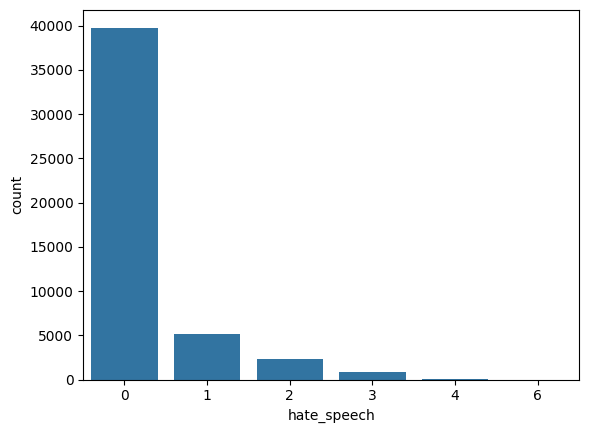

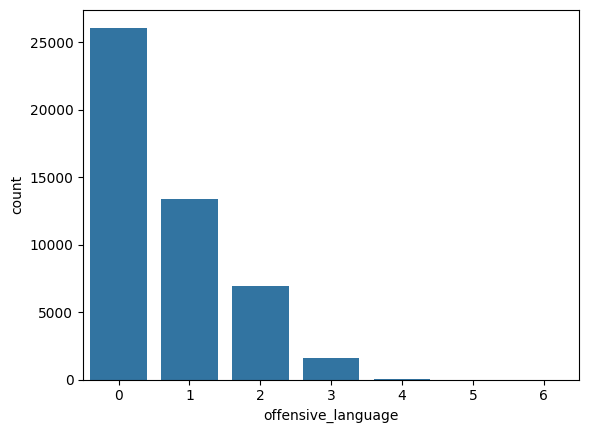

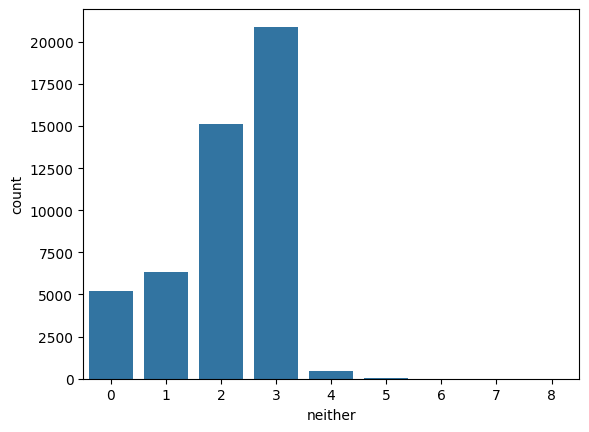

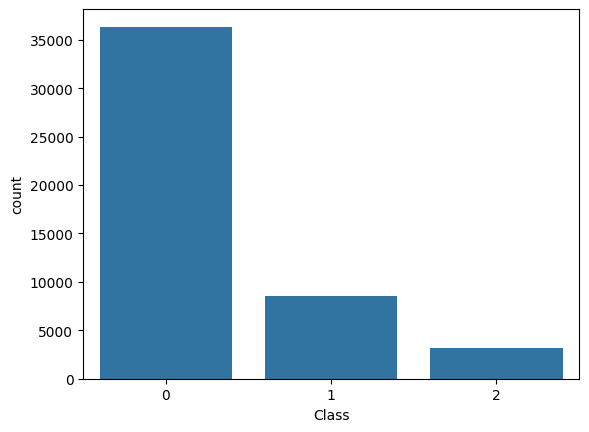

In [127]:
# Exploratory Data Analysis
print(data.head())

print(data.info())

print(data.isnull().sum())

print(data.columns)

# Visualize class distribution
sns.countplot(x = 'hate_speech', data = data)
plt.show()

sns.countplot(x = 'offensive_language', data = data)
plt.show()

sns.countplot(x = 'neither', data = data)
plt.show()

sns.countplot(x = 'Class', data = data)
plt.show()


In [128]:
# Data Preprocessing
# Define preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word not in stop_words])
    return text

# Display first few rows of preprocessed data
print(data.head())

   hate_speech  offensive_language  neither  Class  \
0            0                   0        3      0   
1            0                   0        3      0   
2            0                   0        3      0   
3            0                   0        3      0   
4            0                   0        3      0   

                                               Tweet  
0  ['The political elite are in desperation. Ordi...  
1  ["Am just curious the only people who are call...  
2  ['USERNAME_3 the area politicians are the one ...  
3  ['War expected in Nakuru if something is not d...  
4  ['USERNAME_4 tells kikuyus activists that they...  


['The political elite are in desperation. Ordinary kalenjins are suspicious of kikuyu community']                                                                                                          1
['When jubilee thieves have no answer to any sober question they resort to abuses.Sugoi and Gatundu express is real. #NasaSinkingShip']                                                                    1
['When Kikuyu elites in power plot the murder of poor Kikuyus to cover up their evil..... #RIPMsando']                                                                                                     1
['When Kibaki had 47 PNU mps and ODM had 99 Mps did he fold up even after being defeated in the elections??be honest #NoReformsNoElections']                                                               1
['When Keter tells Ruto RAO is naming #UhuruEuroThieves in a few minutes. They forget they are in Hague pic.twitter.com/dLx4Ot3PxM']                                                

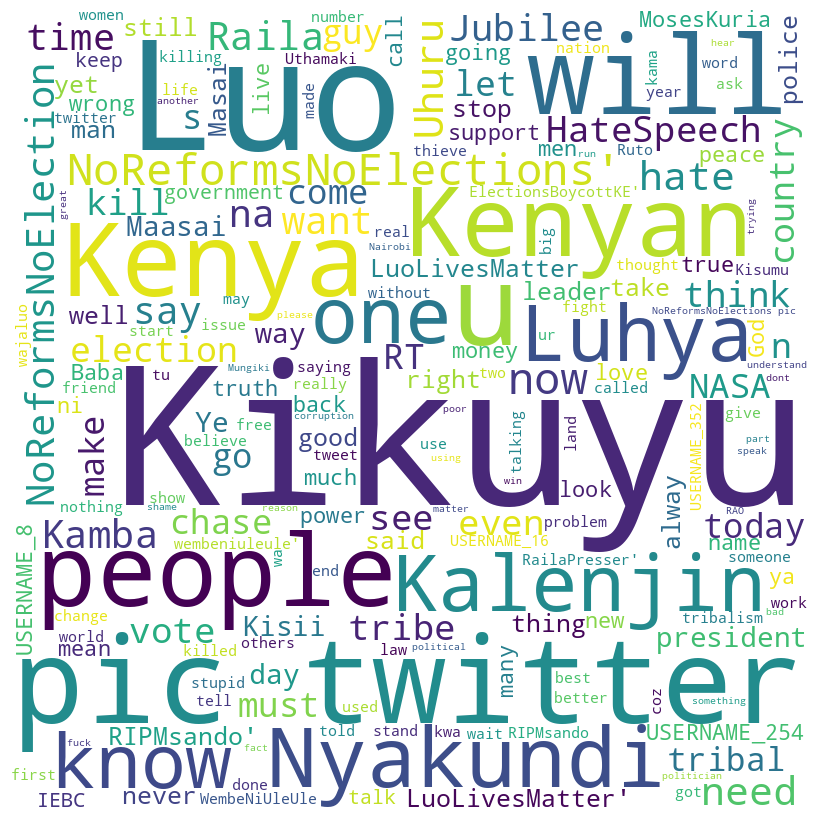

In [129]:
# Display classes present
print(data['Tweet'].value_counts())

# Create a word cloud of the clean dataset
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = STOPWORDS,
                      min_font_size = 10).generate(' '.join(data['Tweet']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [130]:
# Feature Engineering
# Applying preprocessing function to the 'Tweet' column
data['clean_text'] = data['Tweet'].apply(preprocess_text)


# Text Length: Number of characters in each text
data['text_length'] = data['clean_text'].apply(len)

# Word Count: Number of words in each text
data['word_count'] = data['clean_text'].apply(lambda x: len(str(x).split()))

# Punctuation Count: Number of punctuation marks in each text
def calculate_punctuation_count(text):
    return len([c for c in str(text) if c in string.punctuation])

data['punctuation_count'] = data['clean_text'].apply(calculate_punctuation_count)

# Capitalization Ratio: Ratio of uppercase letters to the total number of letters
def calculate_capitalization_ratio(text):
    cleaned_text = str(text).replace(" ", "")
    if len(cleaned_text) > 0:
        return sum(1 for c in cleaned_text if c.isupper()) / len(cleaned_text)
    else:
        return None

data['capitalization_ratio'] = data['clean_text'].apply(calculate_capitalization_ratio)

# POS Tagging: Part-of-speech tagging
data['pos_tags'] = data['clean_text'].apply(lambda x: nltk.pos_tag(word_tokenize(x)))

# Display first few rows of the updated dataset with additional features
print(data.head())

<ipython-input-128-07c5df777fae>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


   hate_speech  offensive_language  neither  Class  \
0            0                   0        3      0   
1            0                   0        3      0   
2            0                   0        3      0   
3            0                   0        3      0   
4            0                   0        3      0   

                                               Tweet  \
0  ['The political elite are in desperation. Ordi...   
1  ["Am just curious the only people who are call...   
2  ['USERNAME_3 the area politicians are the one ...   
3  ['War expected in Nakuru if something is not d...   
4  ['USERNAME_4 tells kikuyus activists that they...   

                                          clean_text  text_length  word_count  \
0  political elite desperation ordinary kalenjins...           74           8   
1  curious people calling old mad kikuyus kalenji...           86          12   
2  username_3 area politicians one blame coz r in...          109          16   
3  war expecte

In [131]:
# Split Data into Train and Test Sets

# Define features (X) and target variable (y)
X = data[['text_length', 'word_count', 'punctuation_count', 'capitalization_ratio']]
y = data['Class']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38460, 4)
X_test shape: (9616, 4)
y_train shape: (38460,)
y_test shape: (9616,)


In [132]:
# Model Selection, Training and Evaluation

# Define a pipeline with an imputer transformer and logistic regression model
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values using mean
    ('scaler', StandardScaler()),                # Standardize features
    ('classifier', LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)),  # Logistic Regression model
])

# Train the pipeline (includes imputation, scaling, and model training)
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      1.00      0.85      7166
           1       0.00      0.00      0.00      1806
           2       0.00      0.00      0.00       644

    accuracy                           0.74      9616
   macro avg       0.25      0.33      0.28      9616
weighted avg       0.56      0.74      0.64      9616



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
